In [1]:
from itertools import product

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

from src.models.layers import (conv2d_complex, BCHConv2DComplex, tri,
                               ECHConv2D)


In [2]:
layer = ECHConv2D(1, 9, initializer=tf.keras.initializers.Constant(1.0))

In [3]:
atoms0, atoms = layer.conv_ch.atoms

In [40]:
atoms0.shape
mask = np.real(np.squeeze(atoms0) + np.sum(atoms, axis=-1)[:,:,0,0,0])

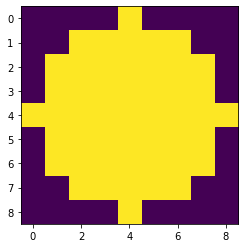

In [42]:
plt.imshow(mask)

In [4]:
atoms.shape

(9, 9, 1, 1, 4, 12)

In [12]:
phi = np.pi * 0.2
rotation_factor = np.array([np.exp(1j * k * phi) for k in range(4)])

In [43]:
x = np.random.uniform(size=(9,9)) * mask
x_rotated = rotate(x, 90, reshape=False)


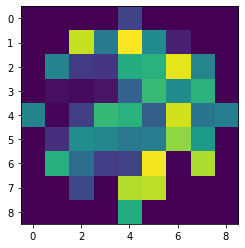

In [44]:
plt.imshow(np.real(x))

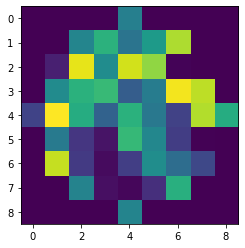

In [45]:
plt.imshow(np.real(x_rotated))

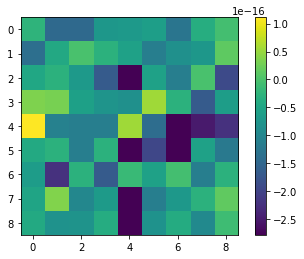

In [46]:
plt.imshow(x-rotate(x_rotated, -90, reshape=False))
plt.colorbar()

In [47]:
x_tot = np.stack([x, x_rotated], axis=0)
x_tot = x_tot[...,np.newaxis]
y = layer(x_tot)


In [48]:
x_tot.shape

(2, 9, 9, 1)

In [49]:
y

<tf.Tensor: shape=(2, 1, 1, 4), dtype=float32, numpy=
array([[[[5.3912253 , 1.0475767 , 0.12638459, 0.20010869]]],


       [[[5.3912244 , 0.9010499 , 0.37889788, 0.09494162]]]],
      dtype=float32)>